### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [5]:
# Read the data from csv
df = pd.read_csv('data/coupons.csv')

In [7]:
# Display the first 5 rows of the DataFrame to get a quick overview of the data
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [9]:
# Display a summary of the DataFrame including column names, non-null counts, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [23]:
# Calculate missing percentage
missing_pct = df.isnull().mean() * 100

# Filter columns with missing data
missing_cols = missing_pct[missing_pct > 0]

# Get their data types
missing_dtypes = df[missing_cols.index].dtypes

# Combine into a summary DataFrame
summary = pd.DataFrame({
    'Data Type': missing_dtypes,
    'Missing %': missing_cols.round(2),
    'Non-Null Count': df.count()[missing_cols.index]
})

print(summary)

                     Data Type  Missing %  Non-Null Count
car                     object      99.15             108
Bar                     object       0.84           12577
CoffeeHouse             object       1.71           12467
CarryAway               object       1.19           12533
RestaurantLessThan20    object       1.02           12554
Restaurant20To50        object       1.49           12495


### Evaluate each column and decide what to do with them 


In [25]:

# Drop 'car' column due to excessive missing data and it's potential influence on the decision is extremely low
df.drop(columns=['car'], inplace=True)

# Fill missing values in other columns with 'Unknown' as it has very low missingness
cols_to_fill = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
df[cols_to_fill] = df[cols_to_fill].fillna('Unknown')

In [27]:
# Confirm there are no columns with missing values 

# Check percentage of missing values in each column
print((df.isnull().mean() * 100).sort_values())

destination             0.0
direction_same          0.0
toCoupon_GEQ25min       0.0
toCoupon_GEQ15min       0.0
toCoupon_GEQ5min        0.0
Restaurant20To50        0.0
RestaurantLessThan20    0.0
CarryAway               0.0
CoffeeHouse             0.0
Bar                     0.0
income                  0.0
direction_opp           0.0
occupation              0.0
has_children            0.0
maritalStatus           0.0
age                     0.0
gender                  0.0
expiration              0.0
coupon                  0.0
time                    0.0
temperature             0.0
weather                 0.0
passanger               0.0
education               0.0
Y                       0.0
dtype: float64


4. What proportion of the total observations chose to accept the coupon?



In [30]:
# Calculate the proportion of 'Y' that is 1 (indicating coupon acceptance)
coupon_acceptance_proportion = df['Y'].mean()

# Print the proportion
print(f"Proportion of total observations that accepted the coupon: {coupon_acceptance_proportion:.4f}")

Proportion of total observations that accepted the coupon: 0.5684


5. Use a bar plot to visualize the `coupon` column.

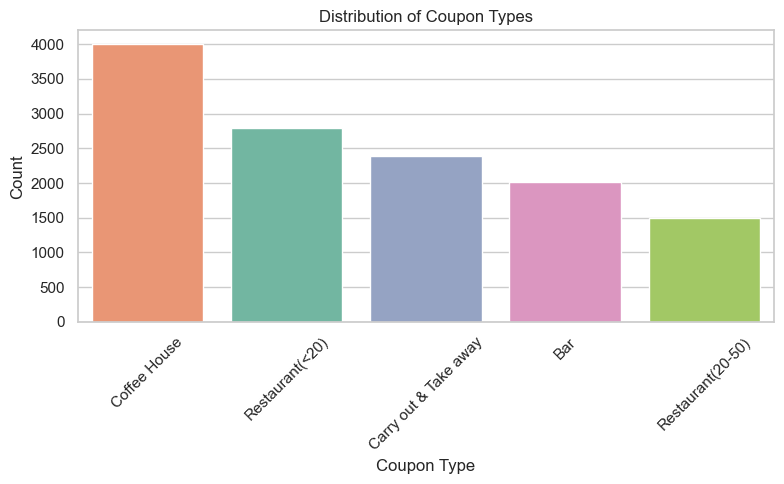

In [32]:
# Set the style
sns.set(style="whitegrid")

# Countplot for the 'coupon' column
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='coupon', hue='coupon', order=df['coupon'].value_counts().index, palette='Set2', legend=False)

plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

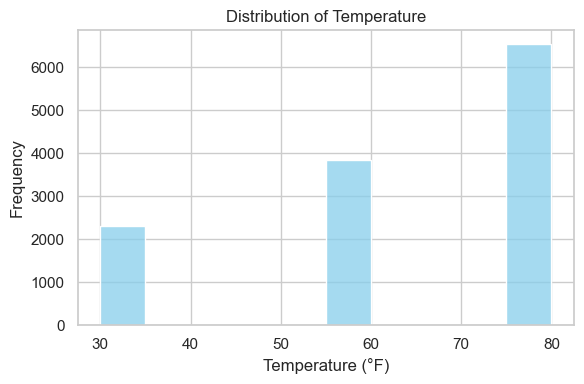

In [34]:
# Set the style
sns.set(style="whitegrid")

# Histogram for the 'temperature' column
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='temperature', bins=10, kde=False, color='skyblue')

plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [36]:
# Create a new DataFrame for bar coupons only
bar_coupons_df = df[df['coupon'] == 'Bar'].copy()

# Quick check
print(bar_coupons_df.shape)
bar_coupons_df.head(2)

(2017, 25)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [38]:
# Total number of bar coupons
total_bar = len(bar_coupons_df)

# Number of accepted bar coupons (Y == 1)
accepted_bar = bar_coupons_df['Y'].sum()

# Proportion accepted
proportion_accepted_bar = accepted_bar / total_bar

print(f"Proportion of accepted bar coupons: {proportion_accepted_bar:.2%}")

Proportion of accepted bar coupons: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [41]:
# Get unique values in 'Bar' column and their counts
bar_value_counts = df['Bar'].value_counts()

# Display the unique values and their counts
print(bar_value_counts)

Bar
never      5197
less1      3482
1~3        2473
4~8        1076
gt8         349
Unknown     107
Name: count, dtype: int64


In [45]:
# First, define groupings based on Bar frequency
low_freq = ['never', 'less1', '1~3']
high_freq = ['4~8', 'gt8']

# Normalize Bar values to lowercase for consistency (if needed)
bar_coupons_df['Bar'] = bar_coupons_df['Bar'].str.lower()

# Group A: 3 or fewer times
group_a = bar_coupons_df[bar_coupons_df['Bar'].isin(low_freq)]

# Group B: more than 3 times
group_b = bar_coupons_df[bar_coupons_df['Bar'].isin(high_freq)]

# Calculate acceptance rates
acceptance_a = group_a['Y'].mean()
acceptance_b = group_b['Y'].mean()

print(f"Acceptance rate (≤ 3 times/month): {acceptance_a:.2%}")
print(f"Acceptance rate (> 3 times/month): {acceptance_b:.2%}")


Acceptance rate (≤ 3 times/month): 37.06%
Acceptance rate (> 3 times/month): 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [48]:
# Get unique values in 'age' column and their counts
age_value_counts = df['age'].value_counts()

# Display the unique values and their counts
print(age_value_counts)

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64


In [50]:
# Define age groups
age_25_plus = ['26', '31', '36', '41', '46', '50plus']
bar_freq_more_than_once = ['1~3', '4~8', 'gt8']

# Group A: Bar > 1 time/month & Age > 25
group_a = df[(df['Bar'].isin(bar_freq_more_than_once)) & (df['age'].isin(age_25_plus))]

# Group B: All others
group_b = df[~((df['Bar'].isin(bar_freq_more_than_once)) & (df['age'].isin(age_25_plus)))]

# Calculate acceptance rates
acceptance_a = group_a['Y'].mean()
acceptance_b = group_b['Y'].mean()

print(f"Acceptance rate (Bar > 1/month & Age > 25): {acceptance_a:.2%}")
print(f"Acceptance rate (Others): {acceptance_b:.2%}")


Acceptance rate (Bar > 1/month & Age > 25): 62.15%
Acceptance rate (Others): 55.35%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [52]:
# Get unique values in 'occupation' column and their counts
occupation_value_counts = df['occupation'].value_counts()

# Display the unique values and their counts
print(occupation_value_counts)

occupation
Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science           

In [54]:
# Get unique values in 'passanger' column and their counts
passanger_value_counts = df['passanger'].value_counts()

# Display the unique values and their counts
print(passanger_value_counts)

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64


In [60]:
# Define occupation categories excluding 'Farming Fishing & Forestry'
excluded_occupations = ['Farming Fishing & Forestry']

# Group A: Bar > 1 time/month, Passenger not a kid, Occupation not Farming Fishing & Forestry
group_a = df[(df['Bar'].isin(bar_freq_more_than_once)) &
             (df['passanger'] != 'Kid(s)') &
             (~df['occupation'].isin(excluded_occupations))]

# Group B: All others
group_b = df[~((df['Bar'].isin(bar_freq_more_than_once)) &
               (df['passanger'] != 'Kid(s)') &
               (~df['occupation'].isin(excluded_occupations)))]

# Calculate acceptance rates
acceptance_a = group_a['Y'].mean()
acceptance_b = group_b['Y'].mean()

print(f"Acceptance rate (Bar > 1/month, Not a Kid Passenger, Occupation not Farming Fishing & Forestry): {acceptance_a:.2%}")
print(f"Acceptance rate (Others): {acceptance_b:.2%}")


Acceptance rate (Bar > 1/month, Not a Kid Passenger, Occupation not Farming Fishing & Forestry): 62.31%
Acceptance rate (Others): 54.60%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [62]:
# Get unique values in 'income' column and their counts
income_value_counts = df['income'].value_counts()

# Display the unique values and their counts
print(income_value_counts)

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64


In [64]:
# Get unique values in 'maritalStatus' column and their counts
maritalStatus_value_counts = df['maritalStatus'].value_counts()

# Display the unique values and their counts
print(maritalStatus_value_counts)

maritalStatus
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: count, dtype: int64


In [68]:
# Define the income group (less than 50K)
low_income = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

# Group 1: Bar > 1 time/month, Not a kid passenger, Not widowed
group_1 = df[(df['Bar'].isin(bar_freq_more_than_once)) & 
             (df['passanger'] != 'Kid(s)') & 
             (df['maritalStatus'] != 'Widowed')]

# Group 2: Bar > 1 time/month, Age < 30
group_2 = df[(df['Bar'].isin(bar_freq_more_than_once)) &
             (df['age'].isin(['below21', '21', '26']))]

# Group 3: Cheap restaurant > 4 times/month and income < 50K
group_3 = df[(df['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
             (df['income'].isin(low_income))]

# Calculate acceptance rates for each group
acceptance_group_1 = group_1['Y'].mean()
acceptance_group_2 = group_2['Y'].mean()
acceptance_group_3 = group_3['Y'].mean()

print(f"Acceptance rate (Group 1): {acceptance_group_1:.2%}")
print(f"Acceptance rate (Group 2): {acceptance_group_2:.2%}")
print(f"Acceptance rate (Group 3): {acceptance_group_3:.2%}")


Acceptance rate (Group 1): 62.31%
Acceptance rate (Group 2): 62.81%
Acceptance rate (Group 3): 60.07%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [80]:
# Hypothesis
## 1. Drivers who are younger, socially active (go to bars more than once a month),
## and not burdened by major family responsibilities (not traveling with kids, not widowed) 
## are more likely to accept bar coupons.



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Explore Coffee House Coupon
1. Let's understand the context by asking What kind of behavior or demographic is likely to accept a Coffee House coupon?
2. Does frequency of visiting coffee places, age, income, or lifestyle influence this?

In [87]:
# Isolate the Coffee House Coupon data

# Filter rows where the coupon type is 'Coffee House'
coffee_df = df[df['coupon'] == 'Coffee House']

In [89]:
# What is the acceptance rate of Coffee House coupons

# Proportion of accepted Coffee House coupons
acceptance_rate = coffee_df['Y'].mean()
print(f"Overall Coffee House coupon acceptance rate: {acceptance_rate:.2%}")

Overall Coffee House coupon acceptance rate: 49.92%


### To formulate a hypothesis let's define 2-3 groups that might influence acceptance 
- Group A: Frequent coffee house visitors
- Group B: Younger people (e.g., under 30)
- Group C: People with no high education level (e.g., Master’s or Doctoral)

In [97]:
# Get unique values in 'CoffeeHouse' column and their counts
CoffeeHouse_value_counts = df['CoffeeHouse'].value_counts()

# Display the unique values and their counts
print(CoffeeHouse_value_counts)

CoffeeHouse
less1      3385
1~3        3225
never      2962
4~8        1784
gt8        1111
Unknown     217
Name: count, dtype: int64


In [99]:
group_a = coffee_df[coffee_df['CoffeeHouse'].isin(['4~8', 'gt8'])]


In [104]:
group_b = coffee_df[coffee_df['age'].isin(['below21', '21', '26'])]


In [101]:
# Get unique values in 'education' column and their counts
education_value_counts = df['education'].value_counts()

# Display the unique values and their counts
print(education_value_counts)

education
Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: count, dtype: int64


In [106]:
group_not_c = coffee_df[~coffee_df['education'].isin(["Graduate degree (Masters or Doctorate)"])]


In [108]:
# verify the shapes of each group
print("Group A (Frequent CoffeeHouse Visitors):", group_a.shape)
print("Group B (Under 30):", group_b.shape)
print("Group Not C (Everyone else):", group_not_c.shape)

Group A (Frequent CoffeeHouse Visitors): (880, 25)
Group B (Under 30): (1881, 25)
Group Not C (Everyone else): (3398, 25)


In [110]:
# Calculate the acceptance rates

accept_a = group_a['Y'].mean()
accept_b = group_b['Y'].mean()
accept_c = group_not_c['Y'].mean()

print(f"Acceptance Rate - Frequent Visitors (Group A): {accept_a:.2%}")
print(f"Acceptance Rate - Younger Drivers (Group B): {accept_b:.2%}")
print(f"Acceptance Rate - Not Highly Educated (Group C): {accept_c:.2%}")

Acceptance Rate - Frequent Visitors (Group A): 67.50%
Acceptance Rate - Younger Drivers (Group B): 53.43%
Acceptance Rate - Not Highly Educated (Group C): 49.74%


#### Hypothesis for Coffee House coupons

1. Drivers who already visit coffee houses frequently are significantly more likely to accept Coffee House coupons, regardless of age or education level.